In [1]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
dir_black = os.path.join("../input/d/prasanshasatpathy/soil-types/Soil types/Black Soil")
dir_Cinder = os.path.join("../input/d/prasanshasatpathy/soil-types/Soil types/Cinder Soil")
dir_Laterite = os.path.join("../input/d/prasanshasatpathy/soil-types/Soil types/Laterite Soil")
dir_peat = os.path.join("../input/d/prasanshasatpathy/soil-types/Soil types/Peat Soil")
dir_yellow = os.path.join("../input/d/prasanshasatpathy/soil-types/Soil types/Yellow Soil")

In [3]:
image_size = 220
batch_size = 10

target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(r"C:\Users\suvad\Soil-types"), 
target_size=(200, 200),
batch_size = batch_size,
classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
class_mode =('categorical')

Found 156 images belonging to 5 classes.


In [5]:
model = tf.keras.models.Sequential ([
   
    #first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    #second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #Flatten the results
    tf.keras.layers.Flatten(),
    
    #128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    
    #5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [7]:
total_sample = train_generator
n_epochs = 30

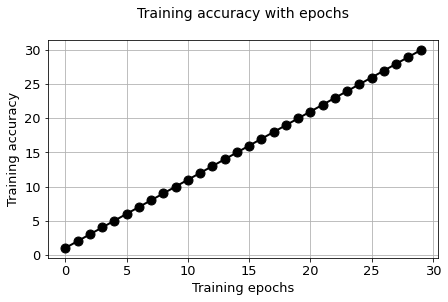

In [8]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=14)
plt.xlabel("Training epochs",fontsize=13)
plt.ylabel("Training accuracy",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [18]:
history = model.fit (train_generator, steps_per_epoch =total_sample/batch_size, epochs = n_epochs,verbose = 1)


TypeError: unsupported operand type(s) for /: 'tuple' and 'tuple'